# Image processing
* 연습과정 중의 파일으로 별다른 용도는 없지만 혹시 필요할까 해서 남겨 놓았습니다.

In [2]:
import PIL
from PIL import Image
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import numpy as np
import os
from functools import reduce
%matplotlib inline

### Load image 

In [4]:
img = Image.open("img/0.jpg")
img.size

(640, 480)

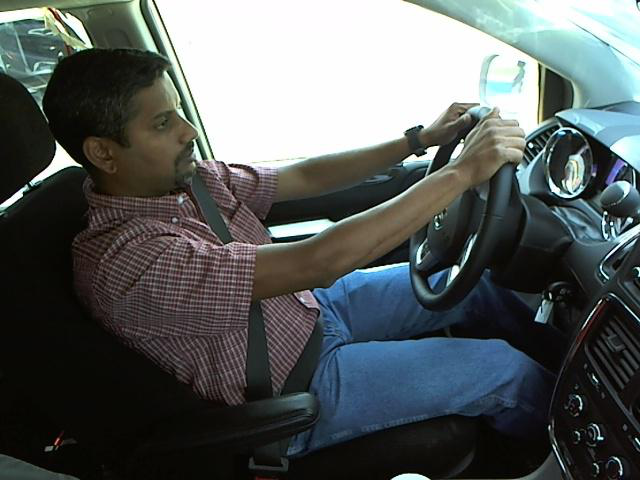

In [5]:
img

###  image resize

In [6]:
change_img = img.resize((120, 90), PIL.Image.ANTIALIAS)

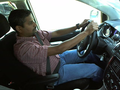

In [7]:
change_img

### Greyscaling

In [8]:
gray_img = change_img.convert("L", dither=1) #convert("L") => make grayscale

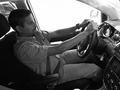

In [9]:
gray_img

### Inversed

In [10]:
inversed_img = Image.eval(gray_img, lambda x : 256-x)

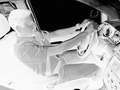

In [11]:
inversed_img

### cut_image

In [12]:
image_cut = np.array(inversed_img)[10:80,20:100]

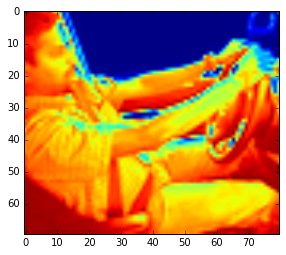

In [13]:
plt.imshow(image_cut);

### make function for image processing

In [14]:
def image_processing(path):
    img = PIL.Image.open(path)
    resize_img = img.resize((120, 90), PIL.Image.ANTIALIAS)
    gray_img = resize_img.convert("L", dither=1)
    image_cut = np.array(gray_img)[10:80,20:100]
    return(image_cut.ravel())

### map and make dataframe

In [15]:
def make_dataframe(a):
    data = list(map(image_processing, 
                    ["D:\\window\imgs\\train\\c" + str(a) + "\\" + i 
                     for i in os.listdir("D:\\window\imgs\\train\\c"+str(a))]
                   )
               )
    df = pd.DataFrame(data, columns=["X"+str(i) for i in range(5600)])
    df["Y"] = a
    return df

In [16]:
def make_train_data():
    df = pd.DataFrame(columns = ["X"+str(i) for i in range(5600)] + ["Y"])
    for i in range(10):
        path = "data/c" + str(i)+ ".csv"
        if path not in os.listdir("data"):
            data = make_dataframe(i)
            data.to_csv(path)
            df = pd.concat([df, data])
        else:
            df = pd.concat([df, pd.read_csv(path).ix[:, 1:]])
        print("{0} / {1} Complete".format(i+1, 10))
    return df

In [ ]:
df = make_train_data()

In [ ]:
df.reset_index(drop=True).to_csv("data/driver_image.csv")

### make test data

In [ ]:
all_data = [0] * 5600
for number, data in enumerate(os.listdir("D:\\window\imgs\\test")):
    data = image_processing("D:\\window\imgs\\test\\" + data)
    all_data = np.vstack([all_data, data])
    if (number + 1) % 10000 == 0:
        df = pd.DataFrame(all_data[1:,:], columns=["X"+str(i) for i in range(5600)])
        print(((number+1) // 10000), "/", 8, " complete") 
        df.to_csv("data/{number}.csv".format(number=((number+1) // 10000)))
        all_data = [0] * 5600
df = pd.DataFrame(all_data[1:,:], columns=["X"+str(i) for i in range(5600)])
print(8, "/", 8, " complete")
df.to_csv("data/{number}.csv".format(number=9))
print("complete")

In [2]:
all_data = pd.concat([
        pd.read_csv("data/1.csv", index_col=0),
        pd.read_csv("data/2.csv", index_col=0),
        pd.read_csv("data/3.csv", index_col=0),
        pd.read_csv("data/4.csv", index_col=0),
        pd.read_csv("data/5.csv", index_col=0),
        pd.read_csv("data/6.csv", index_col=0),
        pd.read_csv("data/7.csv", index_col=0),
        pd.read_csv("data/8.csv", index_col=0),]
          )

In [4]:
all_data.index = os.listdir("D:\\window\imgs\\test")

In [6]:
all_data.to_csv("data/test_img_data.csv")